In [31]:
#Importing the libraries

import warnings
warnings.filterwarnings('ignore')

import random
import pywt  #for wavelet operations
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn

from sklearn.model_selection import KFold

## Dataset Information: [1]

This dataset contains the value of the EEG recordings of 500 patients with 100 patients belonging to each of the 5 categories. The EEG recording data for each patient was recorded over a 23 seconds and contains 4097  data points. Each data point holds the value of the brain activity at a different point in time. The 4097 data points were divided into 23 chunks where each chunk contains 178 data points for 1 second. Therefore, we have 11500 rows in our dataset (500 x 23) and each row has 178 data points and one column representing the label value.

Column 179 (y) stores the the label value which can belong to 5 different classes:
1. Recording of seizure activity
2. They recorder the EEG from the area where the tumor was located (Focal EEG Signals)
3. Yes they identify where the region of the tumor was in the brain and recording the EEG activity from the healthy brain area (Non-Focal EEG Signals)
4. eyes closed, means when they were recording the EEG signal the patient had their eyes closed
5. eyes open, means when they were recording the EEG signal of the brain the patient had their eyes open

All subjects falling in classes 2, 3, 4, and 5 are subjects who did not have epileptic seizure.

In [2]:
#loading the Dataset
eeg = pd.read_csv('Epileptic Seizure Recognition.csv').drop('Unnamed', axis=1)

# Exploratory Data Analysis (EDA)

In [3]:
eeg

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,135,190,229,223,192,125,55,-9,-33,-38,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
1,386,382,356,331,320,315,307,272,244,232,...,164,150,146,152,157,156,154,143,129,1
2,-32,-39,-47,-37,-32,-36,-57,-73,-85,-94,...,57,64,48,19,-12,-30,-35,-35,-36,5
3,-105,-101,-96,-92,-89,-95,-102,-100,-87,-79,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,5
4,-9,-65,-98,-102,-78,-48,-16,0,-21,-59,...,4,2,-12,-32,-41,-65,-83,-89,-73,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11495,-22,-22,-23,-26,-36,-42,-45,-42,-45,-49,...,15,16,12,5,-1,-18,-37,-47,-48,2
11496,-47,-11,28,77,141,211,246,240,193,136,...,-65,-33,-7,14,27,48,77,117,170,1
11497,14,6,-13,-16,10,26,27,-9,4,14,...,-65,-48,-61,-62,-67,-30,-2,-1,-8,5
11498,-40,-25,-9,-12,-2,12,7,19,22,29,...,121,135,148,143,116,86,68,59,55,3


In [4]:
eeg.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,135,190,229,223,192,125,55,-9,-33,-38,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
1,386,382,356,331,320,315,307,272,244,232,...,164,150,146,152,157,156,154,143,129,1
2,-32,-39,-47,-37,-32,-36,-57,-73,-85,-94,...,57,64,48,19,-12,-30,-35,-35,-36,5
3,-105,-101,-96,-92,-89,-95,-102,-100,-87,-79,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,5
4,-9,-65,-98,-102,-78,-48,-16,0,-21,-59,...,4,2,-12,-32,-41,-65,-83,-89,-73,5


In [5]:
eeg.shape

(11500, 179)

In [6]:
eeg.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
count,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.00000,11500.00000,11500.000000,...,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000
mean,-11.581391,-10.911565,-10.187130,-9.143043,-8.009739,-7.003478,-6.502087,-6.68713,-6.55800,-6.168435,...,-10.145739,-11.630348,-12.943478,-13.668870,-13.363304,-13.045043,-12.705130,-12.426000,-12.195652,3.000000
std,165.626284,166.059609,163.524317,161.269041,160.998007,161.328725,161.467837,162.11912,162.03336,160.436352,...,164.652883,166.149790,168.554058,168.556486,167.257290,164.241019,162.895832,162.886311,164.852015,1.414275
min,-1839.000000,-1838.000000,-1835.000000,-1845.000000,-1791.000000,-1757.000000,-1832.000000,-1778.00000,-1840.00000,-1867.000000,...,-1867.000000,-1865.000000,-1642.000000,-1723.000000,-1866.000000,-1863.000000,-1781.000000,-1727.000000,-1829.000000,1.000000
25%,-54.000000,-55.000000,-54.000000,-54.000000,-54.000000,-54.000000,-54.000000,-55.00000,-55.00000,-54.000000,...,-55.000000,-56.000000,-56.000000,-56.000000,-55.000000,-56.000000,-55.000000,-55.000000,-55.000000,2.000000
50%,-8.000000,-8.000000,-7.000000,-8.000000,-8.000000,-8.000000,-8.000000,-8.00000,-7.00000,-7.000000,...,-9.000000,-10.000000,-10.000000,-10.000000,-10.000000,-9.000000,-9.000000,-9.000000,-9.000000,3.000000
75%,34.000000,35.000000,36.000000,36.000000,35.000000,36.000000,35.000000,36.00000,36.00000,35.250000,...,34.000000,34.000000,33.000000,33.000000,34.000000,34.000000,34.000000,34.000000,34.000000,4.000000
max,1726.000000,1713.000000,1697.000000,1612.000000,1518.000000,1816.000000,2047.000000,2047.00000,2047.00000,2047.000000,...,1777.000000,1472.000000,1319.000000,1436.000000,1733.000000,1958.000000,2047.000000,2047.000000,1915.000000,5.000000


In [7]:
eeg.iloc[1:,:].values

array([[ 386,  382,  356, ...,  143,  129,    1],
       [ -32,  -39,  -47, ...,  -35,  -36,    5],
       [-105, -101,  -96, ...,  -69,  -65,    5],
       ...,
       [  14,    6,  -13, ...,   -1,   -8,    5],
       [ -40,  -25,   -9, ...,   59,   55,    3],
       [  29,   41,   57, ...,    2,   20,    4]], dtype=int64)

In [8]:
df = eeg.groupby('y').mean()
df.shape

(5, 178)

In [9]:
df.shape

(5, 178)

In [10]:
eeg.shape[1]

179

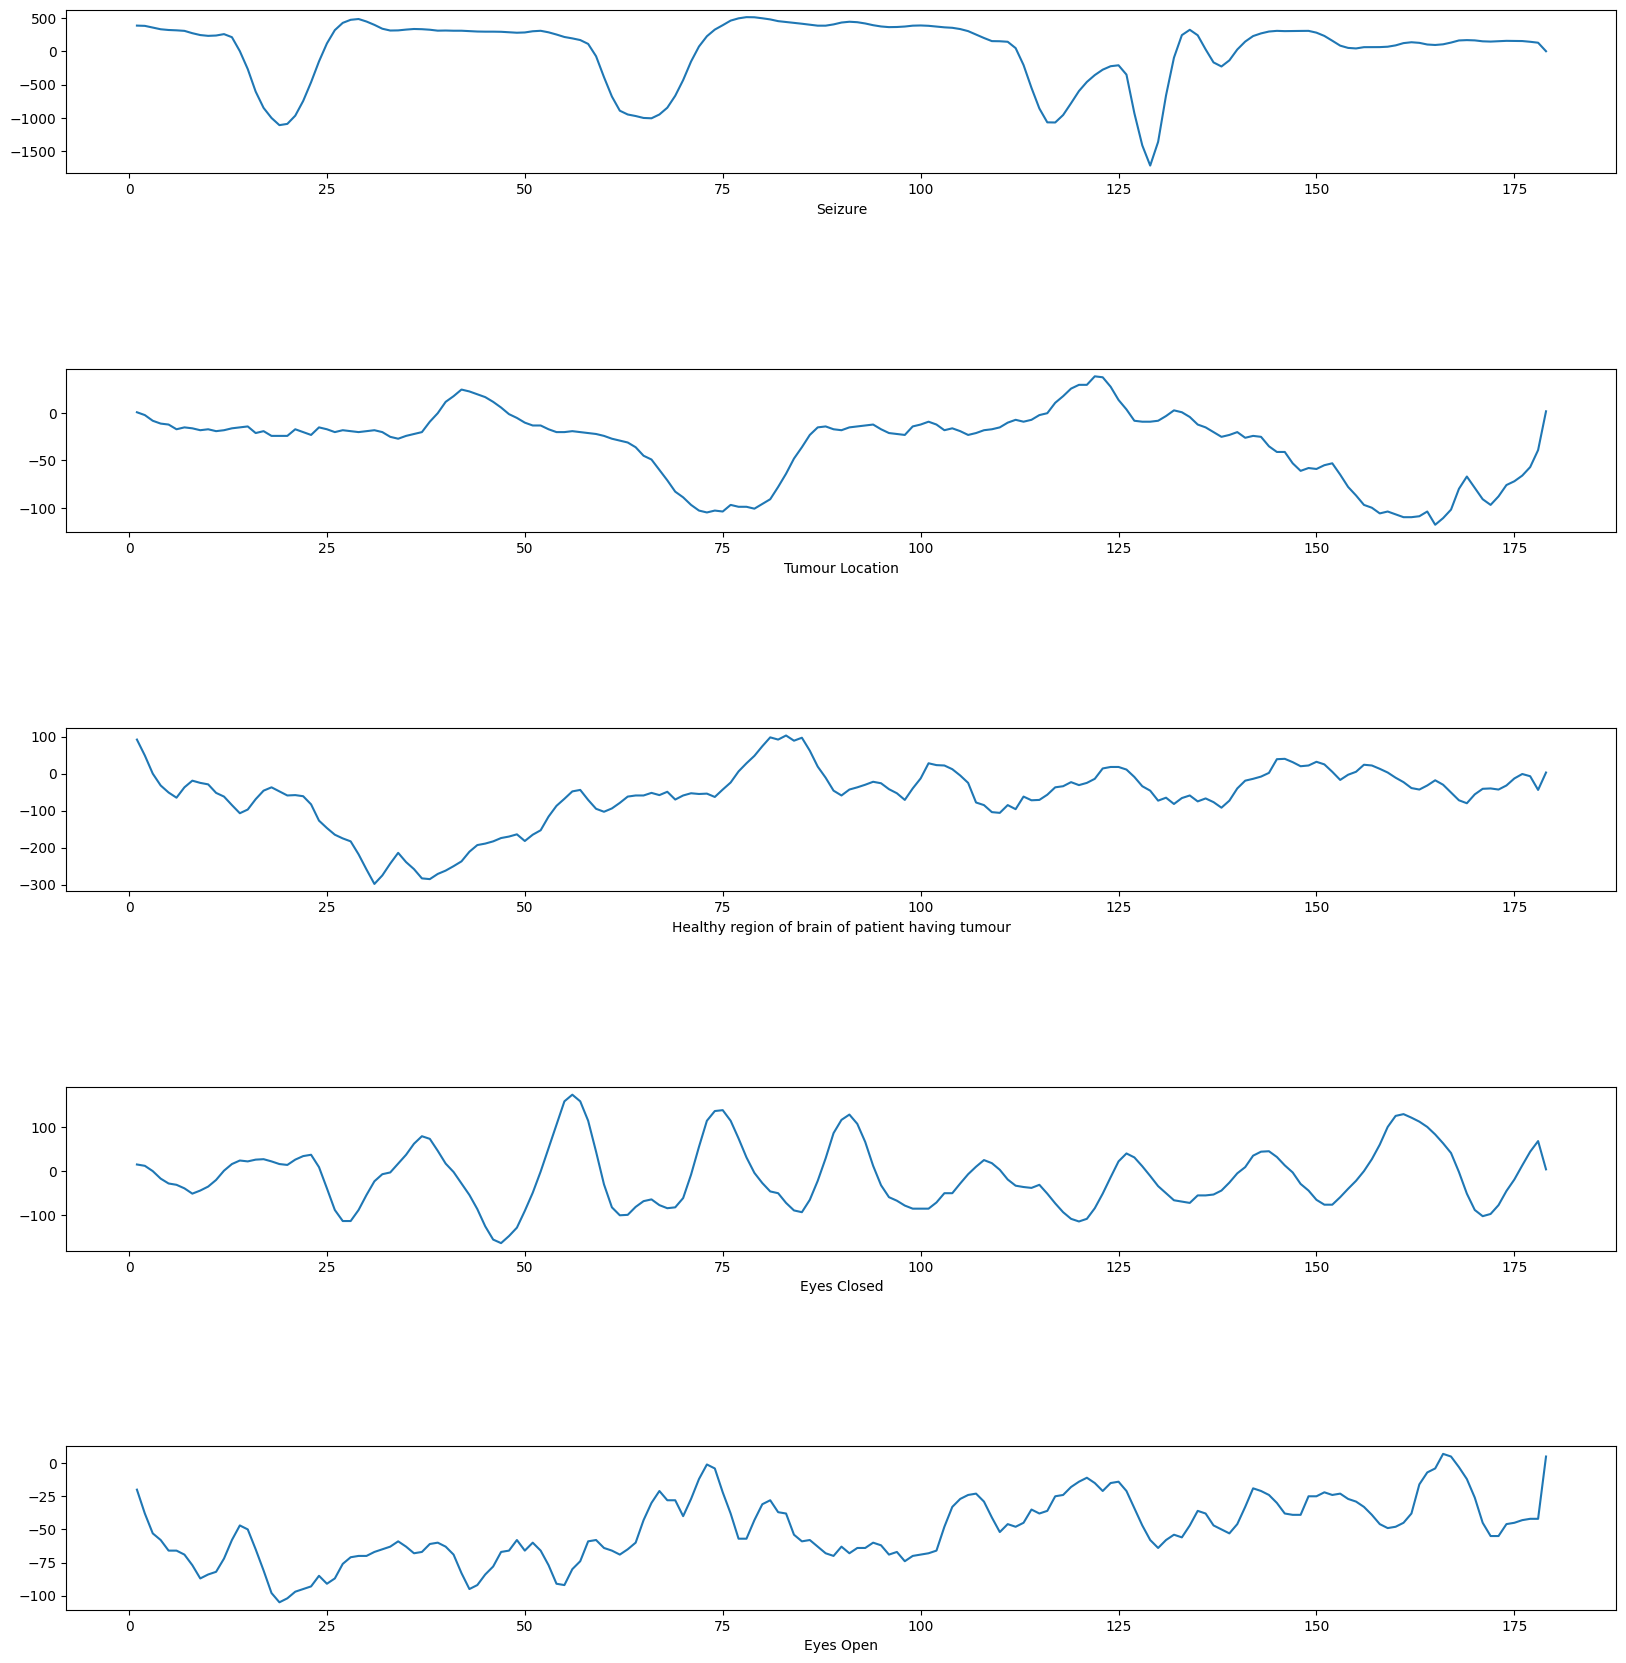

In [28]:
#Plotting one signal for each class

count = 1
t = np.arange(1,180)

plt.figure(figsize=(20,20))
plt.subplots_adjust(bottom=0.1, top=0.9, hspace = 1.2)
xlabels = ['Seizure', 'Tumour Location', 'Healthy region of brain of patient having tumour', 'Eyes Closed', 'Eyes Open']


for i in range(eeg.shape[1]):
    if (eeg.iloc[i].y == count):
        plt.subplot(510+count)
        
        sig = np.asarray(eeg.iloc[i,:])
        
        plt.plot(t,sig)
        plt.xlabel(xlabels[count-1])
        count += 1
        
plt.show()        

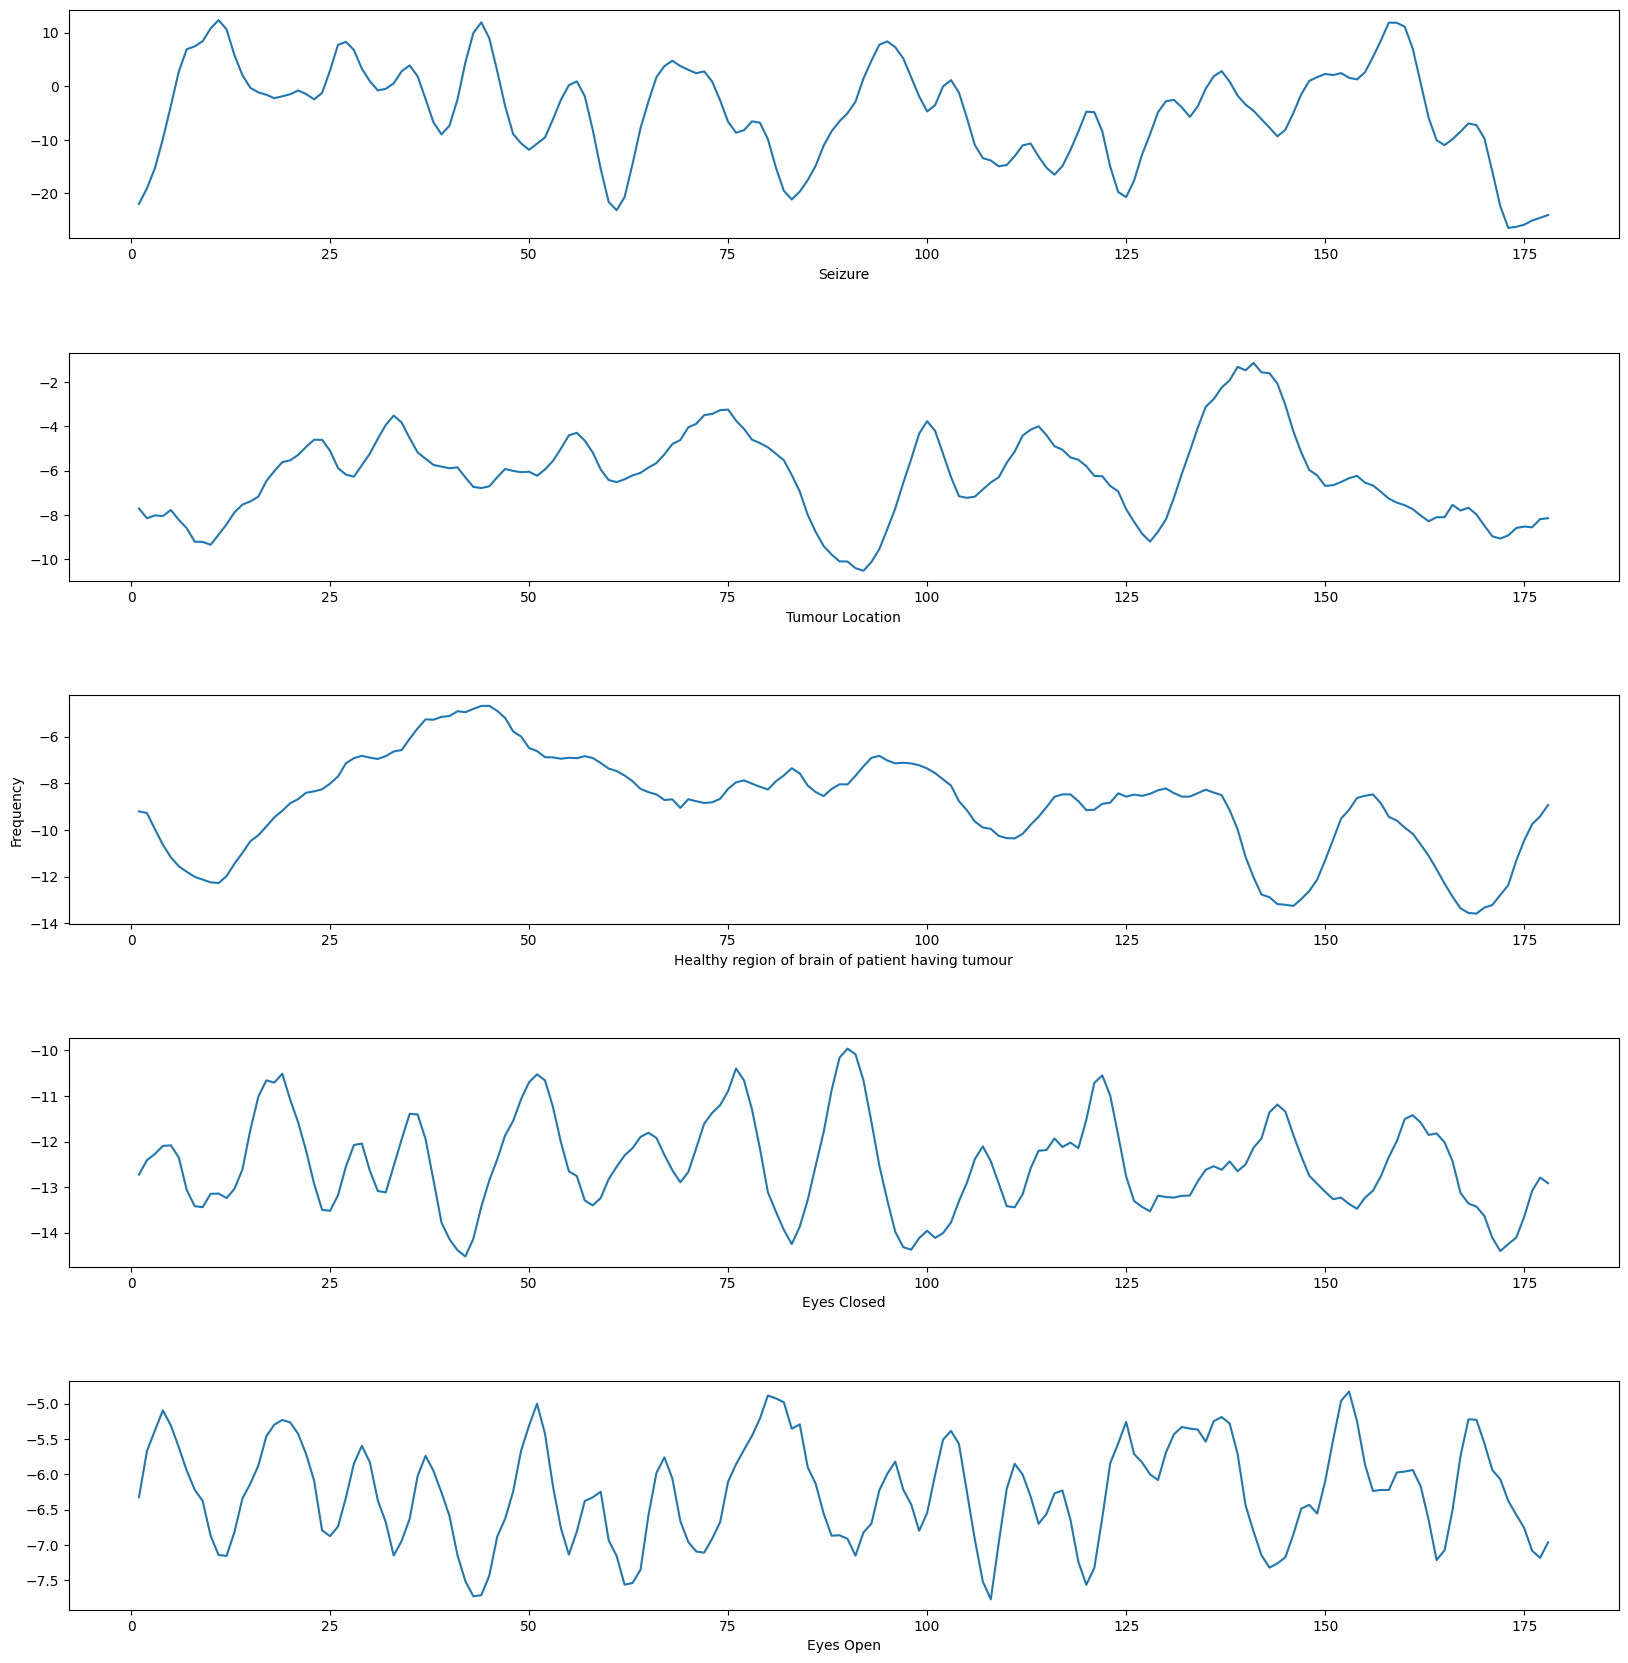

In [26]:
#Plotting the average signal of each of the five classes

t = np.arange(1,179)
xlabels = ['Seizure', 'Tumour Location', 'Healthy region of brain of patient having tumour', 'Eyes Closed', 'Eyes Open']

plt.figure(figsize=(20,20))
plt.subplots_adjust(bottom=0.1, top=0.9, hspace = 0.5)
sp = 510

for i in range (5):
    sp += 1
    plt.subplot(sp)
    sig = np.asarray(df.iloc[i,:])
    plt.xlabel(xlabels[i])
    plt.plot(t,sig)
    
    if(i==2):
        plt.ylabel('Frequency')    

    
#plt.ylabel('Frequency')    
plt.show()

Number of people in the non-seizure class =  9200
Number of people in the seizure class =  2300


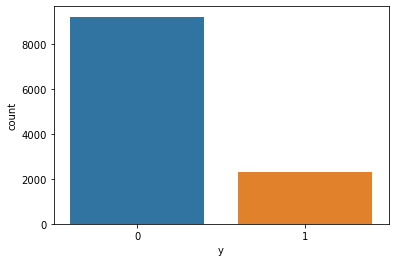

In [70]:
cols = eeg.columns
tgt = eeg.y
tgt[tgt>1]=0
ax = sn.countplot(tgt,label="Count")
non_seizure, seizure = tgt.value_counts()
print('Number of people in the non-seizure class = ', non_seizure)
print('Number of people in the seizure class = ', seizure)

In [71]:
eeg.y.max()

1

# Data pre-processing & DWT

In [14]:
'''wave_family_list = ['haar', 'db', 'sym', 'coif', 'bior', 'rbio', 'dmey', 'gaus', 'mexh', 'morl', 'cgau', 'shan', 'fbsp', 'cmor']
wave_list = []
for wv in wave_types:
    for i in range(1,4):
        cwv = wv+str(i)
        wave_list.append(cwv)
        
(wave_list)''';

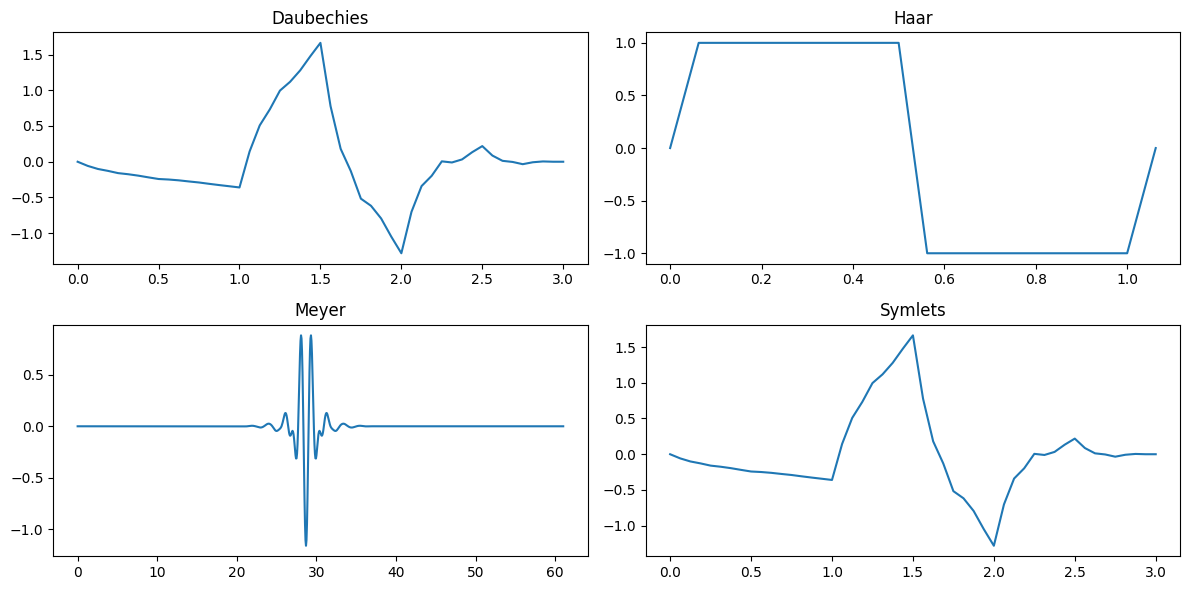

In [30]:
#Types of DWTs

plt.figure(figsize=(12,6))

[phi, psi, x] = pywt.Wavelet('db2').wavefun(level=4)
plt.subplot(2,2,1)
plt.title('Daubechies')
plt.plot(x, psi)

[phi, psi, x] = pywt.Wavelet('haar').wavefun(level=4)
plt.subplot(2,2,2)
plt.title('Haar')
plt.plot(x, psi)

'''phi_d, psi_d, phi_r, psi_r, x = pywt.Wavelet('bior1.1').wavefun(level=4)
plt.subplot(2,3,3)
plt.title('Biorthogonal')
plt.plot(x, psi)'''

[phi, psi, x] = pywt.Wavelet('dmey').wavefun(level=4)
plt.subplot(2,2,3)
plt.title('Meyer')
plt.plot(x, psi)

[phi, psi, x] = pywt.Wavelet('sym2').wavefun(level=4)
plt.subplot(2,2,4)
plt.title('Symlets')
plt.plot(x, psi)

# phi_d, psi_d, phi_r, psi_r, x = pywt.Wavelet('rbio1.1').wavefun(level=4)
# plt.subplot(2,3,6)
# plt.title('rbio.1')
# plt.plot(x, psi)

plt.tight_layout()
plt.show()

In [35]:
#Performing DWT

esr = pd.read_csv('Epileptic Seizure Recognition.csv')

X = esr.iloc[:,1:179].values
y = esr.iloc[:,179].values
y[y>3] = 2 #To convert it into a binary classification problem

#DWT
dbt = '3'
(lf1, hf1) = pywt.dwt(X, 'db'+dbt) #Daubechies 
(lf2, hf2) = pywt.dwt(lf1, 'db'+dbt) #Daubechies 
(lf3, hf3) = pywt.dwt(lf2, 'db'+dbt) #Daubechies 
(lf4, hf4) = pywt.dwt(lf3, 'db'+dbt) #Daubechies 
(lf5, hf5) = pywt.dwt(lf4, 'db'+dbt) #Daubechies 

(cA, cD) = pywt.dwt(lf1, 'db'+dbt) #Daubechies 


(11500, 48)

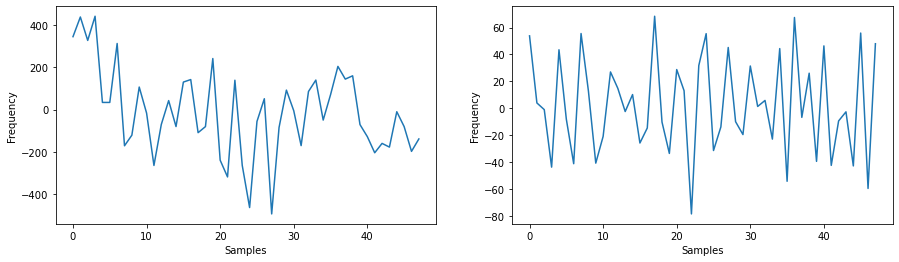

In [36]:
plt.figure(figsize=(15, 4))
t = np.arange(cA.shape[1])
plt.subplot(121)
plt.plot(t, cA[0])
plt.xlabel('Samples')
plt.ylabel('Frequency')
plt.subplot(122)
plt.plot(t, cD[0])
plt.xlabel('Samples')
plt.ylabel('Frequency')

cA.shape 

In [37]:
from scipy.stats import skew
from scipy.stats import kurtosis
np.absolute(skew(cA)).mean()
#cA = abs(cA)
#cA

0.34850244603348896

In [38]:
for i in range (0,cA.shape[0]):
    for j in range (0,cA.shape[1]):
        cA[i][j] = np.cbrt(cA[i][j])
 
np.absolute(skew(cA)).mean()#cA_df = pd.DataFrame.from_dict(cA)
#cA_df.skew()

0.1807679956700862

In [39]:
#Splitting into train & test set
from sklearn.model_selection import train_test_split, cross_val_score
X_train, X_test, y_train, y_test = train_test_split(cA, y, test_size = 0.2)

In [40]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [41]:
X_train

array([[-0.82644612, -0.86845968, -0.79687493, ..., -0.70829736,
        -0.85753452, -0.8811726 ],
       [ 0.71219912, -0.76924993,  0.87620003, ..., -0.79571126,
         1.46549179,  1.51698197],
       [ 0.88067179,  0.93154863,  0.85116253, ..., -0.95701687,
         1.66645444,  1.92397684],
       ...,
       [-1.25040529, -1.16593682, -1.27420098, ..., -1.21578276,
         0.97955832,  1.06703231],
       [-0.87140963, -0.91310012, -0.84965736, ..., -0.93684295,
        -1.02114129, -1.03124874],
       [-0.56054585, -0.54483766, -0.5682833 , ..., -0.95281726,
        -0.62831215,  0.57648485]])

# Hyperparameter Tuning

In [175]:
from sklearn.model_selection import GridSearchCV

In [176]:
'''
#SVM
svc = SVC()
parameters = {
     "gamma"  : [0.01, 0.05, 0.1],
     "C"      : [0.1, 0.5, 1],
     }

grid = HalvingGridSearchCV(svc, parameters, n_jobs=4, scoring="roc_auc", cv=40)

grid.fit(X, y)
print(grid.best_score_)
print(grid.best_params_)
'''

'\n#SVM\nsvc = SVC()\nparameters = {\n     "gamma"  : [0.01, 0.05, 0.1],\n     "C"      : [0.1, 0.5, 1],\n     }\n\ngrid = HalvingGridSearchCV(svc, parameters, n_jobs=4, scoring="roc_auc", cv=40)\n\ngrid.fit(X, y)\nprint(grid.best_score_)\nprint(grid.best_params_)\n'

In [33]:
X_train.shape

(9200, 48)

# Training

In [ ]:
#SVM
from sklearn.svm import SVC
clf = SVC()
clf.fit(X_train, y_train)
y_pred_svc = clf.predict(X_test)
acc_svc = round(np.average(cross_val_score(clf, X_train, y_train))*100,2)
#acc_svc = round(clf.score(X_train, y_train) * 100, 2)
print ('SVM Accuracy = ', str(acc_svc) + '%')

In [189]:
#Gradient Boost
from sklearn.ensemble import GradientBoostingClassifier

cls = GradientBoostingClassifier()
cls.fit(X_train, y_train)
train_score = cls.score(X_train, y_train)
test_score = cls.score(X_test, y_test)
acc_gb = round(np.average(cross_val_score(cls, X_train, y_train))*100,2)
print ('GB Accuracy = ', str(acc_svc) + '%')
#print("The Train Score is {}".format(train_score))
#print("The Test Score is {}".format(test_score))

GB Accuracy =  97.32%


In [180]:
#Linear SVM
from sklearn.svm import SVC, LinearSVC
clf = LinearSVC()
clf.fit(X_train, y_train)
y_pred_linear_svc = clf.predict(X_test)
acc_linear_svc = round(clf.score(X_train, y_train) * 100, 2)
print (str(acc_linear_svc) + '%')

79.59%


In [184]:
#logistic Regression
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train, y_train)
y_pred_log_reg = clf.predict(X_test)
acc_log_reg = round(clf.score(X_train, y_train) * 100, 2)
print (str(acc_log_reg) + ' %')

79.71 %


In [182]:
#Naive Bayes
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_train, y_train)
y_pred_gnb = clf.predict(X_test)
acc_gnb = round(clf.score(X_train, y_train) * 100, 2)
print (str(acc_gnb) + '%')

94.55%


In [183]:
#K-Nearest Neighbours
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier()
clf.fit(X_train, y_train)
y_pred_knn = clf.predict(X_test)
acc_knn = round(clf.score(X_train, y_train) * 100, 2)
print (str(acc_knn)+'%')

88.37%


In [196]:
#Importing keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense

#ANN
classifier = Sequential()

# Adding input layer and first hidden layer
classifier.add(Dense(output_dim = 80, init = 'uniform', activation = 'relu', input_dim = 48))

# Adding second hidden layer
classifier.add(Dense(output_dim = 80, init = 'uniform', activation = 'relu'))

# Adding the output layer
classifier.add(Dense(output_dim = 1, init = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

#Fitting the ANN to the training set
classifier.fit(X_train, y_train, batch_size = 10, nb_epoch = 100)


Epoch 1/100
9200/9200 [==============================] - 1s 153us/step - loss: 0.3374 - accuracy: 0.88000s - l
Epoch 2/100
9200/9200 [==============================] - 1s 125us/step - loss: 0.1407 - accuracy: 0.9512
Epoch 3/100
9200/9200 [==============================] - 1s 119us/step - loss: 0.1032 - accuracy: 0.96320s - los
Epoch 4/100
9200/9200 [==============================] - 1s 135us/step - loss: 0.0899 - accuracy: 0.96730s - loss: 0.0873 - accu
Epoch 5/100
9200/9200 [==============================] - 1s 116us/step - loss: 0.0777 - accuracy: 0.97200s - loss: 0.0811 - accura - ETA: 0s - loss: 0.0800 - accuracy: 0.
Epoch 6/100
9200/9200 [==============================] - 1s 141us/step - loss: 0.0712 - accuracy: 0.9738
Epoch 7/100
9200/9200 [==============================] - 1s 111us/step - loss: 0.0612 - accuracy: 0.9793
Epoch 8/100
9200/9200 [==============================] - 1s 139us/step - loss: 0.0587 - accuracy: 0.9805
Epoch 9/100
9200/9200 [==============================] 

In [198]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)
acc_ANN = round(clf.score(X_train, y_train) * 100, 2)
print (str(acc_ANN) + '%')

79.71%


# Results

In [185]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Support Vector Machines', 
              'KNN', 'Naive Bayes', 'Linear SVM'],
    
    'Score': [acc_log_reg, acc_svc, 
              acc_knn, acc_gnb, acc_linear_svc]
    })

models.sort_values(by='Score', ascending=False)

,Model,Score
1,Support Vector Machines,97.32
3,Naive Bayes,94.55
2,KNN,88.37
0,Logistic Regression,79.71
4,Linear SVM,79.59


## --------------------------------------------------------------------------------------------------------------------------------------------

In [185]:
df = pd.read_csv('Epileptic Seizure Recognition.csv')

In [186]:
wave_types = ['haar', 'db', 'sym', 'coif', 'bior', 'rbio', 'dmey', 'gaus', 'mexh', 'morl', 'cgau', 'shan', 'fbsp', 'cmor']
wave_list = []
for wv in wave_types:
    for i in range(1,4):
        cwv = wv+str(i)
        wave_list.append(cwv)
        
len(wave_list)

42

In [101]:
#List of Discrete wavelets
ls = pywt.wavelist(family=None, kind='discrete')
ls

['bior1.1',
 'bior1.3',
 'bior1.5',
 'bior2.2',
 'bior2.4',
 'bior2.6',
 'bior2.8',
 'bior3.1',
 'bior3.3',
 'bior3.5',
 'bior3.7',
 'bior3.9',
 'bior4.4',
 'bior5.5',
 'bior6.8',
 'coif1',
 'coif2',
 'coif3',
 'coif4',
 'coif5',
 'coif6',
 'coif7',
 'coif8',
 'coif9',
 'coif10',
 'coif11',
 'coif12',
 'coif13',
 'coif14',
 'coif15',
 'coif16',
 'coif17',
 'db1',
 'db2',
 'db3',
 'db4',
 'db5',
 'db6',
 'db7',
 'db8',
 'db9',
 'db10',
 'db11',
 'db12',
 'db13',
 'db14',
 'db15',
 'db16',
 'db17',
 'db18',
 'db19',
 'db20',
 'db21',
 'db22',
 'db23',
 'db24',
 'db25',
 'db26',
 'db27',
 'db28',
 'db29',
 'db30',
 'db31',
 'db32',
 'db33',
 'db34',
 'db35',
 'db36',
 'db37',
 'db38',
 'dmey',
 'haar',
 'rbio1.1',
 'rbio1.3',
 'rbio1.5',
 'rbio2.2',
 'rbio2.4',
 'rbio2.6',
 'rbio2.8',
 'rbio3.1',
 'rbio3.3',
 'rbio3.5',
 'rbio3.7',
 'rbio3.9',
 'rbio4.4',
 'rbio5.5',
 'rbio6.8',
 'sym2',
 'sym3',
 'sym4',
 'sym5',
 'sym6',
 'sym7',
 'sym8',
 'sym9',
 'sym10',
 'sym11',
 'sym12',
 'sym13',

In [187]:
ls = pywt.wavelist(family=None, kind='discrete')
len(ls)

106

In [188]:
dic = {}

In [189]:
for i in range(106):
    wave = ls[i]
    (cA, cD) = pywt.dwt(df.iloc[:,1:179].values, wave)  
    
    y = df.iloc[:,179].values
    y[y>1] = 0

    #Splitting into train & test set
    from sklearn.model_selection import train_test_split, cross_val_score
    X_train, X_test, y_train, y_test = train_test_split(cA, y, test_size = 0.2)

    #SVM
    from sklearn.svm import SVC
    clf = SVC()
    clf.fit(X_train, y_train)
    y_pred_svc = clf.predict(X_test)
    #acc_svc = round(clf.score(X_train, y_train) * 100, 2)
    acc_svc =  round(np.average(cross_val_score(clf, X_train, y_train))*100,2)
    print ('SVM ', wave, ' Accuracy = ', str(acc_svc) + '%')
    
    dic[wave] = acc_svc

SVM  bior1.1  Accuracy =  96.9%
SVM  bior1.3  Accuracy =  97.0%
SVM  bior1.5  Accuracy =  97.02%
SVM  bior2.2  Accuracy =  96.95%
SVM  bior2.4  Accuracy =  96.93%
SVM  bior2.6  Accuracy =  96.72%
SVM  bior2.8  Accuracy =  96.88%
SVM  bior3.1  Accuracy =  97.02%
SVM  bior3.3  Accuracy =  96.98%
SVM  bior3.5  Accuracy =  96.8%
SVM  bior3.7  Accuracy =  97.09%
SVM  bior3.9  Accuracy =  96.85%
SVM  bior4.4  Accuracy =  97.09%
SVM  bior5.5  Accuracy =  96.92%
SVM  bior6.8  Accuracy =  96.98%
SVM  coif1  Accuracy =  97.17%
SVM  coif2  Accuracy =  97.01%
SVM  coif3  Accuracy =  97.01%
SVM  coif4  Accuracy =  96.89%
SVM  coif5  Accuracy =  96.91%
SVM  coif6  Accuracy =  96.92%
SVM  coif7  Accuracy =  96.88%
SVM  coif8  Accuracy =  96.71%
SVM  coif9  Accuracy =  97.08%
SVM  coif10  Accuracy =  96.88%
SVM  coif11  Accuracy =  96.82%
SVM  coif12  Accuracy =  96.9%
SVM  coif13  Accuracy =  96.61%
SVM  coif14  Accuracy =  96.8%
SVM  coif15  Accuracy =  96.9%
SVM  coif16  Accuracy =  96.86%
SVM  coi

In [127]:
#Accuracies of various DWTs with SVM
print(score_table.sort_values(by = 'Accuracy',ascending=False).to_string())

,Accuracy
db3,98.41
sym12,98.38
rbio2.2,98.37
rbio2.6,98.36
coif14,98.34
...,...
coif12,98.04
coif8,98.04
coif17,98.03
db19,98.01


# Citations

[1] Andrzejak RG, Lehnertz K, Rieke C, Mormann F, David P, Elger CE (2001) Indications of nonlinear deterministic and finite dimensional structures in time series of brain electrical activity: Dependence on recording region and brain state, Phys. Rev. E, 64, 061907